- Dipesh Kumar Singh 
- Parveen 
- Chandan Kumar

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import  LabelEncoder
%matplotlib inline

In [2]:
df = pd.read_csv(r"D:Final WM Data.csv")
df.head()

,Unnamed: 0,Name,Brand,Model,Rating,FType,Load,WashingCapacity,WashingMethod,SpinSpeed,Built_In_Heater,Dryer,EnergyRating,Price
0,0,SAMSUNG 6 kg 5 Star Inverter with Hygiene Stea...,SAMSUNG,WW60R20GLMA/TL,4.4,Fully Automatic,Front Load,6.0,Tumble Wash,1000,Yes,Air Dry,5.0,22399
1,1,"Candes 6.5 kg Semi Automatic Top Load Red, Whi...",Candes,CTPL65PLSWM,4.8,Semi Automatic,Top Load,6.5,Pulsator Wash,1500,No,Spin Dry,5.0,6799
2,2,SAMSUNG 6.5 kg Diamond Drum feature Fully Auto...,SAMSUNG,WA65A4002VS/TL,4.4,Fully Automatic,Top Load,6.5,Pulsator Wash,680,No,Air Dry,3.0,14499
3,3,SAMSUNG 7.2 kg with Double Storm Technology Se...,SAMSUNG,WT725QPNDMPXTL 02,4.4,Semi Automatic,Top Load,7.2,Pulsator Wash,740,No,Air Dry,3.0,9699
4,4,"Whirlpool 7 kg 5 Star,Turbo Scrub Technology S...",Whirlpool,SUPERB ATOM 70S GREY DAZZLE (5YR),4.4,Semi Automatic,Top Load,7.0,Impeller Wash,1450,No,Spin Dry,5.0,10240


In [3]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
df.WashingMethod.unique()

array(['Tumble Wash', 'Pulsator Wash', 'Impeller Wash', 'Agitator Wash',
       'Others'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             752 non-null    object 
 1   Brand            752 non-null    object 
 2   Model            752 non-null    object 
 3   Rating           752 non-null    float64
 4   FType            752 non-null    object 
 5   Load             752 non-null    object 
 6   WashingCapacity  752 non-null    float64
 7   WashingMethod    752 non-null    object 
 8   SpinSpeed        752 non-null    int64  
 9   Built_In_Heater  752 non-null    object 
 10  Dryer            752 non-null    object 
 11  EnergyRating     752 non-null    float64
 12  Price            752 non-null    int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 76.5+ KB


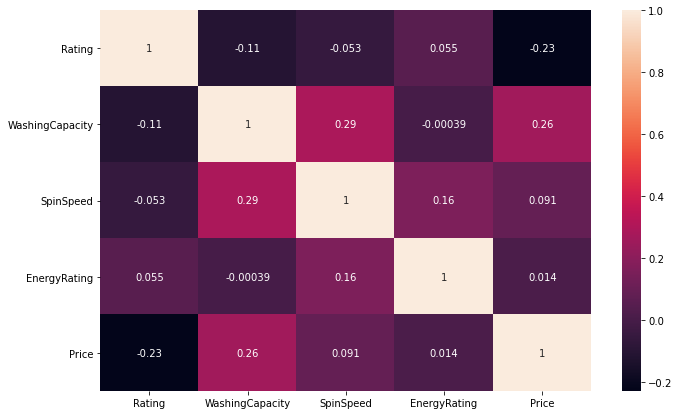

In [6]:
cor = df.corr()
plt.figure(figsize=(11,7))
sns.heatmap(cor, annot=True)
plt.show()

In [7]:
df.Dryer.unique()

array(['Air Dry', 'Spin Dry', 'No Dryer'], dtype=object)

In [8]:
df.nunique()

Name               614
Brand               39
Model              605
Rating              23
FType                4
Load                 2
WashingCapacity     26
WashingMethod        5
SpinSpeed           30
Built_In_Heater      2
Dryer                3
EnergyRating         3
Price              407
dtype: int64

In [9]:
label_Ftype = LabelEncoder()
label_WashingMethod=LabelEncoder()

df['FType'] = label_Ftype.fit_transform(df['FType'])
df['WashingMethod'] = label_WashingMethod.fit_transform(df['WashingMethod'])

In [10]:
df['Load'] = df['Load'].replace({'Front Load': 1, 'Top Load':0})

In [11]:
df['Dryer'] = df['Dryer'].replace({'No Dryer': 0, 'Spin Dry':1,'Air Dry':2})

In [12]:
df['Built_In_Heater'] = df['Built_In_Heater'].replace({'No': 0, 'Yes':1})

In [13]:
df.head()

,Name,Brand,Model,Rating,FType,Load,WashingCapacity,WashingMethod,SpinSpeed,Built_In_Heater,Dryer,EnergyRating,Price
0,SAMSUNG 6 kg 5 Star Inverter with Hygiene Stea...,SAMSUNG,WW60R20GLMA/TL,4.4,0,1,6.0,4,1000,1,2,5.0,22399
1,"Candes 6.5 kg Semi Automatic Top Load Red, Whi...",Candes,CTPL65PLSWM,4.8,1,0,6.5,3,1500,0,1,5.0,6799
2,SAMSUNG 6.5 kg Diamond Drum feature Fully Auto...,SAMSUNG,WA65A4002VS/TL,4.4,0,0,6.5,3,680,0,2,3.0,14499
3,SAMSUNG 7.2 kg with Double Storm Technology Se...,SAMSUNG,WT725QPNDMPXTL 02,4.4,1,0,7.2,3,740,0,2,3.0,9699
4,"Whirlpool 7 kg 5 Star,Turbo Scrub Technology S...",Whirlpool,SUPERB ATOM 70S GREY DAZZLE (5YR),4.4,1,0,7.0,1,1450,0,1,5.0,10240


In [14]:
display(df.describe().round(2))

,Rating,FType,Load,WashingCapacity,WashingMethod,SpinSpeed,Built_In_Heater,Dryer,EnergyRating,Price
count,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00,752.00
mean,4.09,0.48,0.26,7.48,2.92,1056.88,0.28,1.37,4.07,20525.68
std,0.52,0.66,0.44,1.33,0.97,305.03,0.45,0.50,1.00,11270.95
min,1.00,0.00,0.00,3.00,0.00,300.00,0.00,0.00,3.00,4990.00
25%,4.00,0.00,0.00,6.50,3.00,740.00,0.00,1.00,3.00,12797.50
50%,4.30,0.00,0.00,7.00,3.00,1000.00,0.00,1.00,5.00,16897.00
75%,4.40,1.00,1.00,8.00,3.00,1350.00,1.00,2.00,5.00,26569.00
max,5.00,3.00,1.00,18.00,4.00,1600.00,1.00,2.00,5.00,69990.00


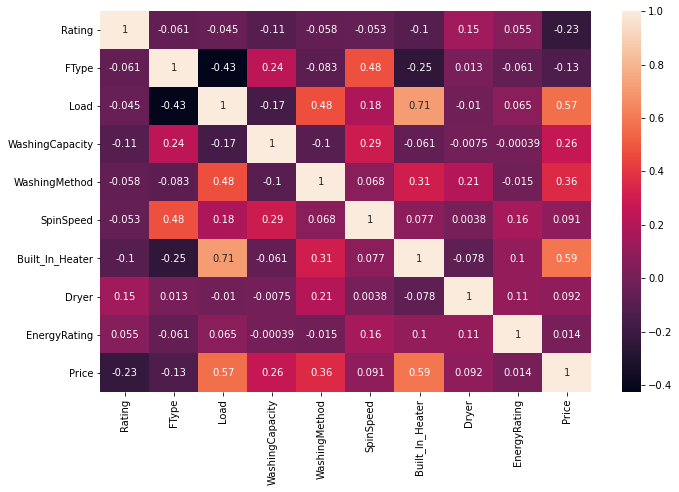

In [15]:
cor = df.corr()
plt.figure(figsize=(11,7))
sns.heatmap(cor, annot=True)
plt.show()

In [16]:
dt = pd.get_dummies(df, columns=['Brand'])
dt

,Name,Model,Rating,FType,Load,WashingCapacity,WashingMethod,SpinSpeed,Built_In_Heater,Dryer,...,Brand_SAMSUNG,Brand_Sansui,Brand_Siemens,Brand_TCL,Brand_TOSHIBA,Brand_Thomson,Brand_Voltas Beko,Brand_Whirlpool,Brand_White Westinghouse (Trademark by Electtrolux),Brand_iFFALCON
0,SAMSUNG 6 kg 5 Star Inverter with Hygiene Stea...,WW60R20GLMA/TL,4.4,0,1,6.0,4,1000,1,2,...,1,0,0,0,0,0,0,0,0,0
1,"Candes 6.5 kg Semi Automatic Top Load Red, Whi...",CTPL65PLSWM,4.8,1,0,6.5,3,1500,0,1,...,0,0,0,0,0,0,0,0,0,0
2,SAMSUNG 6.5 kg Diamond Drum feature Fully Auto...,WA65A4002VS/TL,4.4,0,0,6.5,3,680,0,2,...,1,0,0,0,0,0,0,0,0,0
3,SAMSUNG 7.2 kg with Double Storm Technology Se...,WT725QPNDMPXTL 02,4.4,1,0,7.2,3,740,0,2,...,1,0,0,0,0,0,0,0,0,0
4,"Whirlpool 7 kg 5 Star,Turbo Scrub Technology S...",SUPERB ATOM 70S GREY DAZZLE (5YR),4.4,1,0,7.0,1,1450,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,IFB 7 kg Fully Automatic Front Load with In-bu...,ELITE ZXS,3.2,0,1,7.0,2,1000,1,1,...,0,0,0,0,0,0,0,0,0,0
748,LG 7 kg Fully Automatic Front Load with In-bui...,FHV1207ZWB,3.2,0,1,7.0,2,1200,1,1,...,0,0,0,0,0,0,0,0,0,0
749,Whirlpool 8 kg Semi Automatic Top Load Red (S...,SEMI AUTOMATIC ACE 8.0 SUPER SOAK(30133)CORAL ...,3.2,1,0,8.0,1,1400,0,1,...,0,0,0,0,0,0,0,1,0,0
750,SAMSUNG 8.5 kg 5 star Semi Automatic Top Load ...,WT85R4000LL/TL,4.4,1,0,8.5,3,1350,0,2,...,1,0,0,0,0,0,0,0,0,0


Splitting:


In [17]:
x = dt.drop(['Price','Name','Model'], axis=1)
y = dt['Price']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

### Random Forest Regression:

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(x_train , y_train)
#accuracies = cross_val_score(estimator = rfr, x = x_train, y = y_train, cv = 5,verbose = 1)
y_pred = rfr.predict(x_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % rfr.score(x_test, y_test))
#print(accuracies)


###### Random Forest ######
Score : 0.8276


In [21]:
r2 = r2_score(y_test, y_pred)
print('R2     : %0.2f ' % r2)

R2     : 0.83 


In [22]:
print('Score : %.4f' % rfr.score(x_train, y_train))

Score : 0.9802


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators":[10,20,30,40,50],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1, 2, 5],
    'max_depth': [15,17,21,22]
}
rfr = RandomForestRegressor()
rfr= GridSearchCV(rfr, params, scoring="neg_root_mean_squared_error", n_jobs=-1, verbose=1, cv=3)
rfr.fit(x_train, y_train)
best_params = rfr.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best paramters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 20})


In [28]:
rfr = RandomForestRegressor(n_estimators=20,max_depth=15, min_samples_leaf=2, min_samples_split= 3)
rfr.fit(x_train , y_train)
#accuracies = cross_val_score(estimator = rfr, x = x_train, y = y_train, cv = 5,verbose = 1)
y_pred = rfr.predict(x_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % rfr.score(x_test, y_test))
#print(accuracies)


###### Random Forest ######
Score : 0.8315


In [29]:
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

In [30]:
estimator = rfr.estimators_[19]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded=True,
                                feature_names=x_train.columns,  
                                )
graph =  graphviz.Source(dot_data)

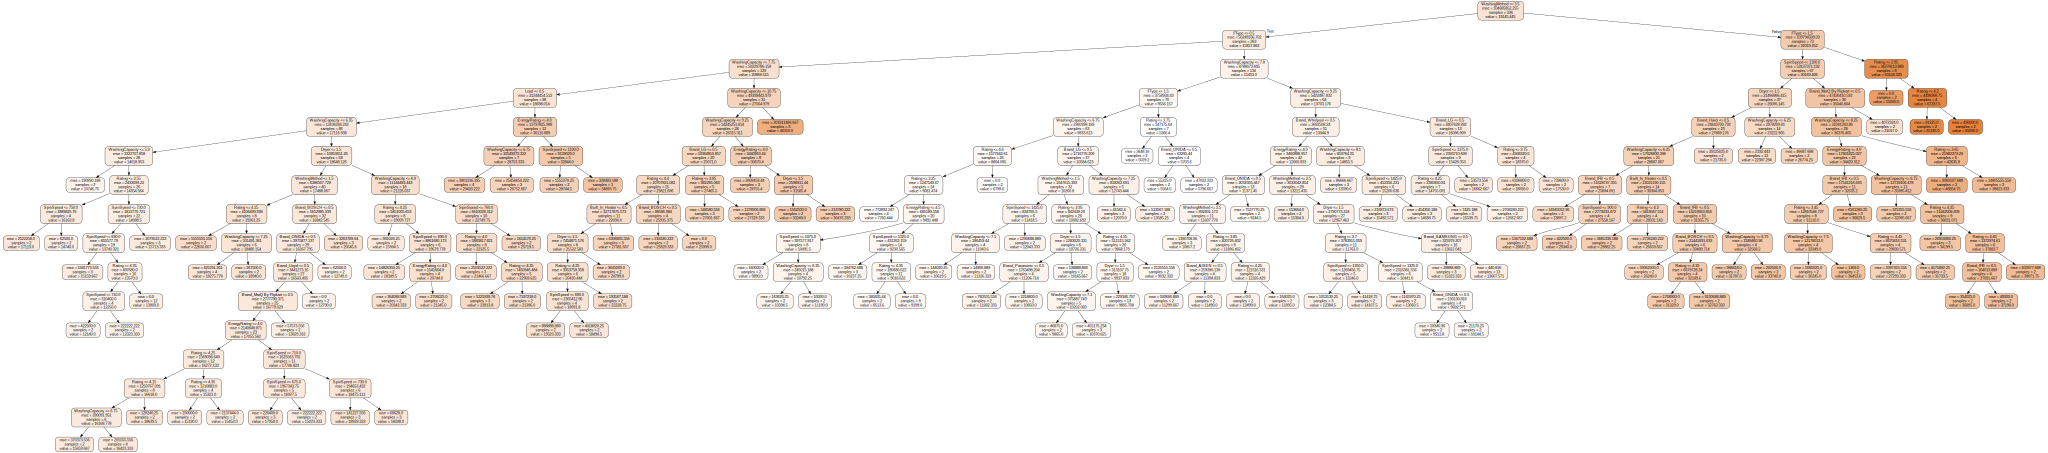

In [31]:
graph